In [66]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/My Drive/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [68]:
import os 
os.chdir('/content/drive/My Drive/CSC310/notes/assets')

In [69]:
from dtreeviz.trees import *
from assets.treeviz import tree_print
from IPython.display import Image, display_svg, SVG
import pandas as pd

In [70]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
url = "https://raw.githubusercontent.com/Tranqpenguin/CSC310/main/KosteckiDillon.csv"

In [72]:
df1 = pd.read_csv(url)
df1

,Unnamed: 0,id,time,dos,hatype,age,airq,medication,headache,sex
0,1,1,-11,753,Aura,30,9.0,continuing,yes,female
1,2,1,-10,754,Aura,30,7.0,continuing,yes,female
2,3,1,-9,755,Aura,30,10.0,continuing,yes,female
3,4,1,-8,756,Aura,30,13.0,continuing,yes,female
4,5,1,-7,757,Aura,30,18.0,continuing,yes,female
...,...,...,...,...,...,...,...,...,...,...
4147,4148,133,44,1232,Aura,26,20.0,continuing,yes,male
4148,4149,133,45,1233,Aura,26,27.0,continuing,no,male
4149,4150,133,46,1234,Aura,26,28.0,continuing,no,male
4150,4151,133,47,1235,Aura,26,33.0,continuing,no,male


In [73]:
df = df1.drop(['Unnamed: 0','id'],axis=1)
df

,time,dos,hatype,age,airq,medication,headache,sex
0,-11,753,Aura,30,9.0,continuing,yes,female
1,-10,754,Aura,30,7.0,continuing,yes,female
2,-9,755,Aura,30,10.0,continuing,yes,female
3,-8,756,Aura,30,13.0,continuing,yes,female
4,-7,757,Aura,30,18.0,continuing,yes,female
...,...,...,...,...,...,...,...,...
4147,44,1232,Aura,26,20.0,continuing,yes,male
4148,45,1233,Aura,26,27.0,continuing,no,male
4149,46,1234,Aura,26,28.0,continuing,no,male
4150,47,1235,Aura,26,33.0,continuing,no,male


In [74]:
df.describe


<bound method NDFrame.describe of       time   dos hatype  age  airq  medication headache     sex
0      -11   753   Aura   30   9.0  continuing      yes  female
1      -10   754   Aura   30   7.0  continuing      yes  female
2       -9   755   Aura   30  10.0  continuing      yes  female
3       -8   756   Aura   30  13.0  continuing      yes  female
4       -7   757   Aura   30  18.0  continuing      yes  female
...    ...   ...    ...  ...   ...         ...      ...     ...
4147    44  1232   Aura   26  20.0  continuing      yes    male
4148    45  1233   Aura   26  27.0  continuing       no    male
4149    46  1234   Aura   26  28.0  continuing       no    male
4150    47  1235   Aura   26  33.0  continuing       no    male
4151    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 8 columns]>

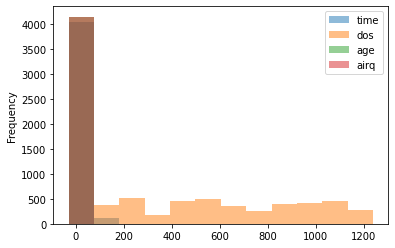

In [75]:
df.plot.hist(bins=12, alpha=0.5)

In [76]:
features_df = df.drop(['headache','hatype','medication','sex'],axis=1)# features
target_df = pd.DataFrame(df['headache']) # y_Train
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

In [77]:
tree_print(dtree,features_df)

if age =< 38.5: 
  |then if age =< 35.5: 
  |  |then if dos =< 121.5: 
  |  |  |then if time =< -27.5: 
  |  |  |  |then if time =< -28.5: 
  |  |  |  |  |then yes
  |  |  |  |  |else no
  |  |  |  |else yes
  |  |  |else if dos =< 206.5: 
  |  |  |  |then if age =< 29.0: 
  |  |  |  |  |then if age =< 25.5: 
  |  |  |  |  |  |then if dos =< 197.5: 
  |  |  |  |  |  |  |then yes
  |  |  |  |  |  |  |else if airq =< 28.5: 
  |  |  |  |  |  |  |  |then if dos =< 198.5: 
  |  |  |  |  |  |  |  |  |then no
  |  |  |  |  |  |  |  |  |else yes
  |  |  |  |  |  |  |  |else if time =< 17.5: 
  |  |  |  |  |  |  |  |  |then no
  |  |  |  |  |  |  |  |  |else if time =< 20.5: 
  |  |  |  |  |  |  |  |  |  |then yes
  |  |  |  |  |  |  |  |  |  |else no
  |  |  |  |  |  |else if dos =< 185.5: 
  |  |  |  |  |  |  |then if time =< 55.5: 
  |  |  |  |  |  |  |  |then if dos =< 161.5: 
  |  |  |  |  |  |  |  |  |then if time =< 3.5: 
  |  |  |  |  |  |  |  |  |  |then if time =< 1.5: 
  |  |  |  |  

In [78]:
predict_array = dtree.predict(features_df)      # produces an array of labels
predicted_labels = pd.DataFrame(predict_array)  # turn it into a DF
predicted_labels.columns = ['headache'] 

In [79]:
target_df['headache'].replace(["yes", "no"], [1,2], inplace=True)

In [80]:
import numpy as np
target_df= target_df.to_numpy()
target_df= target_df.flatten()
target_df

array([1, 1, 1, ..., 2, 2, 1])

In [81]:
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [82]:
features_df.columns

Index(['time', 'dos', 'age', 'airq'], dtype='object')

In [83]:
viz = dtreeviz(dtree, # The model we have just created
               features_df, # Training featues(dataframe)
               target_df,  # Target(1D numpy array)
               target_name='headache',
               feature_names= features_df.columns, # Name of the features
               class_names= ["yes", "no"] # need class_names for classifier
              )  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Fon

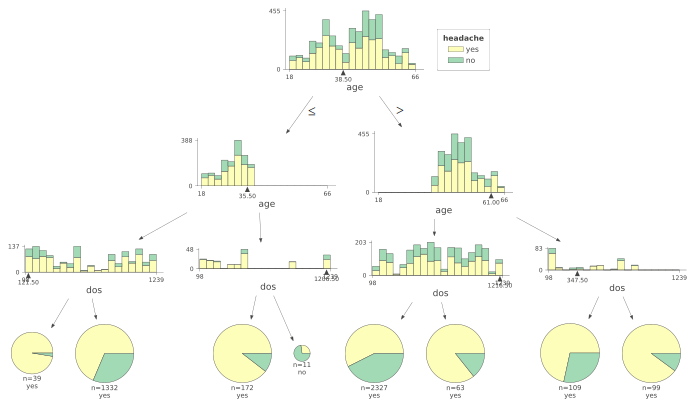

In [84]:
viz



> the question I am trying to answer in this data set is that is there is a correlation between the headaches, the age of the patient, medication, and the dose of the medication.



> I am going to be building a classification model for this data set that will determine which age group the medication works best for.



> I expect a resualt of a few graphs that will tell me what conditions are best for this medication to help the patients. 




